In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np    

In [43]:
from shapely import geometry
from shapely.ops import unary_union
import geopandas as gpd

import warnings
warnings.filterwarnings('ignore')

In [48]:
hMap = pd.read_csv('data/hcomp.map',header=None)
vMap = pd.read_csv('data/vcomp.map',header=None)

hMap.columns = ['xlow','ylow','xhigh','yhigh','hor_comp']
vMap.columns = ['xlow','ylow','xhigh','yhigh','ver_comp']


##filtering out the rows whose compressibility (col4) is more than 50%
canCompress_hMap = hMap[hMap['hor_comp'] <= -0.5]
canCompress_vMap = vMap[vMap['ver_comp'] <= -0.5]

canCompress_hMap['xlow']= canCompress_hMap['xlow'].astype(float)
canCompress_vMap['xlow']= canCompress_vMap['xlow'].astype(float)



canCompress_vMap.sort_values(['xlow','ylow','xhigh','yhigh'],inplace = True)
canCompress_hMap.sort_values(['xlow','ylow','xhigh','yhigh'], inplace = True)
#display(canCompress_vMap,canCompress_hMap)


canCompress_vMap['xDelta']=canCompress_vMap['xhigh'].astype(float)-canCompress_vMap['xlow'].astype(float)
canCompress_vMap['yDelta']=canCompress_vMap['yhigh'].astype(float)-canCompress_vMap['ylow'].astype(float)
canCompress_hMap['xDelta']=canCompress_hMap['xhigh'].astype(float)-canCompress_hMap['xlow'].astype(float)
canCompress_hMap['yDelta']=canCompress_hMap['yhigh'].astype(float)-canCompress_hMap['ylow'].astype(float)

#display(canCompress_vMap)


# find maximum value of a single column
min_vxlow = canCompress_hMap['xlow'].min();
max_vxhigh = canCompress_hMap['xhigh'].max();

min_vylow = canCompress_hMap['ylow'].min();
max_vyhigh = canCompress_hMap['yhigh'].max();
polygons = []

Total num of polygons Pre-Compression---->  37387


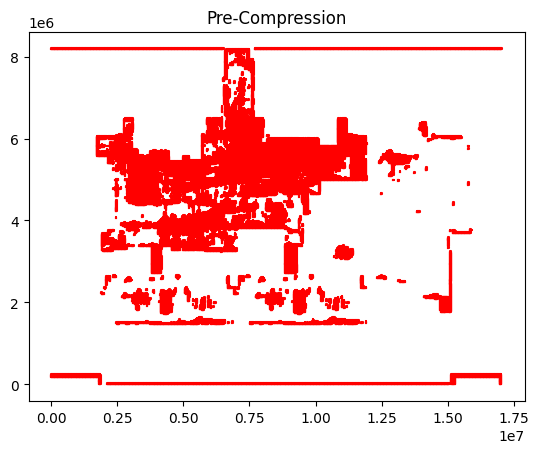

In [49]:
##plotting multiple polygons based on the co-ords extracted post compression
for ind in canCompress_hMap.index:
    p1 = geometry.Point(canCompress_hMap['xlow'][ind],canCompress_hMap['ylow'][ind])
    p2 = geometry.Point(canCompress_hMap['xlow'][ind]+canCompress_hMap['xDelta'][ind],canCompress_hMap['ylow'][ind])
    p3 = geometry.Point(canCompress_hMap['xlow'][ind]+canCompress_hMap['xDelta'][ind],canCompress_hMap['ylow'][ind]+canCompress_hMap['yDelta'][ind])
    p4 = geometry.Point(canCompress_hMap['xlow'][ind],canCompress_hMap['ylow'][ind]+canCompress_hMap['yDelta'][ind])
    points = [p1, p2, p3, p4, p1]
    poly = geometry.Polygon([[p.x, p.y] for p in points])
    polygons.append(poly)

print("Total num of polygons Pre-Compression----> ", len(polygons))
for ind in range(len(polygons)):
    x, y = polygons[ind].exterior.xy
    plt.plot(x, y, c="red")

plt.title("Pre-Compression")
plt.show()

###end of plotting code (post compression)

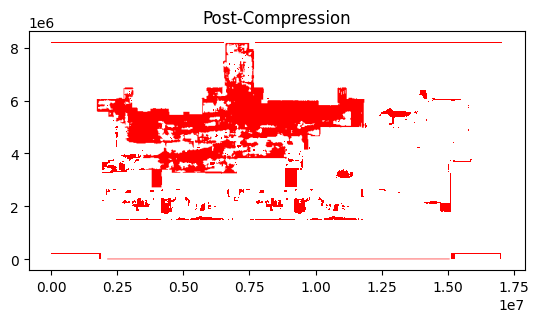

In [50]:
##union of polygons - Compression
union = gpd.GeoSeries(unary_union(polygons))
union.plot(color = 'red')
plt.title("Post-Compression")
plt.show()

In [51]:
##detracing coordinates to cross-verify the compression results

detraceDF = pd.DataFrame(columns= ['xlow','ylow','xhigh','yhigh'])
def detraceCoords(coordinates):
    global detraceDF
    x,y = coordinates
    row = {'xlow' : min(x) , 'ylow' : min(y) , 'xhigh' : max(x) , 'yhigh' : max(y)}
    ##append dictionary only if ignore_index=True 
    detraceDF = detraceDF.append(row,ignore_index=True)


##changing geoPandas series to pandas dataframe and then to numpy array
coord_arr = pd.DataFrame(union).to_numpy()
compressed_polygons = list(coord_arr[0][0].geoms)

print("Total num of polygons Post-Compression----> ", len(compressed_polygons))

for index in range(len(compressed_polygons)):
    ##to give x,y coordinates of the union polyon
    detraceCoords(compressed_polygons[index].exterior.xy)

    
display(detraceDF)

##saving the compressed co-ords into a file
np.savetxt(r'data/hmap_compressed.map', detraceDF.values, fmt='%d',delimiter=',')

Total num of polygons Post-Compression---->  201


,xlow,ylow,xhigh,yhigh
0,0.0,0.0,1889280.0,253440.0
1,1912320.0,2211840.0,2004480.0,2234880.0
2,1889280.0,2234880.0,1912320.0,2257920.0
3,2004480.0,2327040.0,2073600.0,2373120.0
4,1912320.0,3248640.0,2856960.0,3778560.0
...,...,...,...,...
196,15183360.0,3686400.0,15897600.0,3801600.0
197,15206400.0,4377600.0,15229440.0,4446720.0
198,15759360.0,4861440.0,15782400.0,4930560.0
199,15759360.0,5736960.0,15782400.0,5760000.0
